In [127]:
import pandas as pd 
df=pd.read_csv("pd_speech_features.csv",header=1)
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [129]:
df.shape

(756, 755)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [133]:
df.columns

Index(['id', 'gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', length=755)

## What is Feature Selection:
#### Feature selection is one of the key techniques applied in machine learning and data mining for selecting those features (also called variables or attributes) that bear much relevance to a given task or problem. The process involves the selection of a subset of the available features that is most important or influential to explain the target variable while discarding the rest.

#### The key goal of feature selection is to improve the model's performance while reducing the number of features, in a way that it prevents overfitting, improves the interpretability of the model, and reduces the computational cost for training and testing.

#### Suppose that you are considering a dataset of customers related to a marketing campaign, for whom there are several features regarding demographics: age, sex, income, occupation, level of education, marital status, and location.

#### Yet again, not all of them necessarily are relevant or informative, or useful in an objective function that predicts the interest a customer will have in the marketing campaign. Thus, feature selection identifies which characteristics are most important and rejects, if necessary, unimportant or redundant features.

#### Selection of features might be done by statistical approaches, such as correlation analysis or mutual information, by measuring the relationship between each variable and the target variable.



In [136]:
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import statsmodels.api as sm


from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier



### Data Preparation:

In [90]:
df.isna().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [92]:
y = df["class"]
X = df.drop(["id","class"], axis = 1)

In [94]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 753 entries, gender to tqwt_kurtosisValue_dec_36
dtypes: float64(749), int64(4)
memory usage: 4.3 MB


In [96]:
X.describe()


,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,1.673391e-05,...,21.026054,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110
std,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,2.290134e-05,...,43.716898,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991
min,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,6.860000e-07,...,1.342700,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000
25%,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,5.260000e-06,...,1.814850,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750
50%,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,9.530000e-06,...,3.075050,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250
75%,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,1.832500e-05,...,12.129975,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325
max,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,2.564800e-04,...,355.516100,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700


### The first thing we notice in the information is that the value range is not the same, so we may do some scaling to our variables since the features with greater value could dominate the model. For that, we are going to do Standard scaling, also known as Z-score normalization. This is a common technique in machine learning used to transform numerical features so that they have a mean of 0 and a standard deviation of 1.

In [98]:
X = (X - X.mean())/X.std()


<Axes: xlabel='class'>

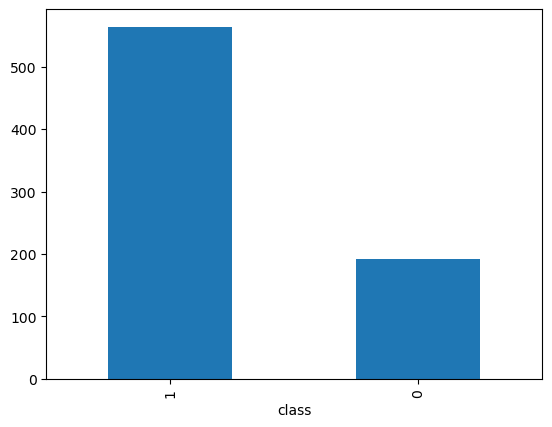

In [99]:
y_count = y.value_counts()
y_count.plot(kind='bar')

### Data visualization:

We will visualize the features in the data to get a better sense of their distribution and the range of their values. We'll be using violinplot for this purpose.

A violin plot is the quantitative display of data from different groups or categories that traditionally might have been shown as box plots, with additional information of distribution shape included.

Yet, some of the key benefits derived from using a violin plot include, basically, combining information about the data distribution (like a box plot) with information of the density of the data (like a kernel density plot). This can be pretty helpful to provide a comprehensive view of the data itself but also the differences or possible similarities between groups.

Another advantage of a violin plot is that it can show multiple groups or categories side by side, which can easily be compared visually. This could be helpful in visualizing the pattern or trend in the data.

We will visualize the features ten by ten for clarity.

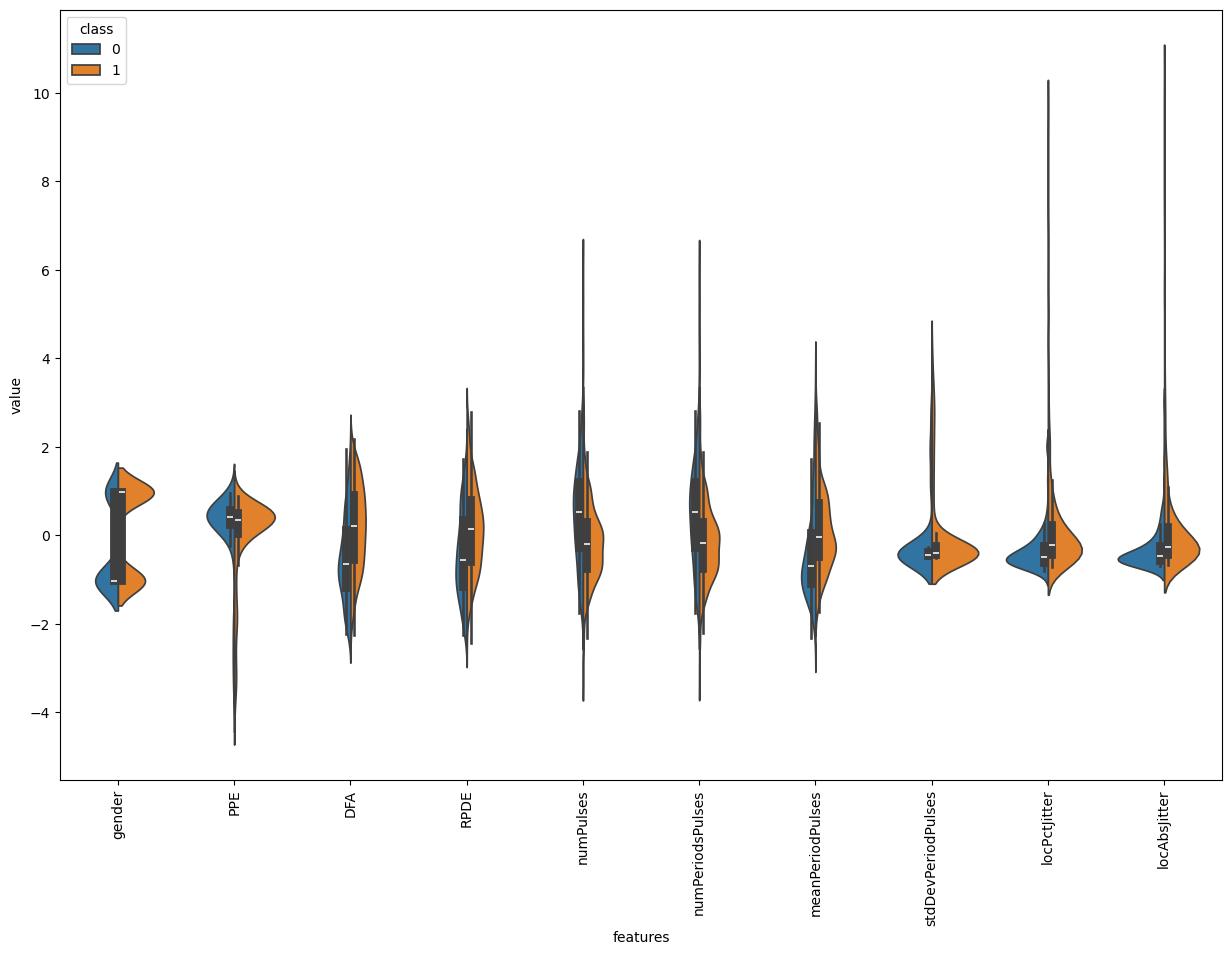

In [105]:
# Concatenate and reshape the DataFrame for visualization
df = pd.concat([y, X.iloc[:, 0:10]], axis=1) 
df = pd.melt(
    df, 
    id_vars="class",  
    var_name="features",  
    value_name="value"  
)

# Plot violin plot
plt.figure(figsize=(15, 10))
sns.violinplot(
    data=df,
    x="features", 
    y="value", 
    hue="class", 
    split=True
)
plt.xticks(rotation=90)
plt.show()


gender :
Les classes 0 et 1 ont des distributions similaires. Cela indique que la variable gender n'apporte probablement pas beaucoup d'information discriminante.
PPE :
La répartition de la classe 1 semble plus concentrée autour de 0, tandis que la classe 0 a une distribution légèrement plus dispersée avec une queue vers des valeurs négatives.
Cela pourrait suggérer que PPE a un potentiel discriminatif modéré.
DFA et RPDE :

Ces variables montrent une légère distinction entre les classes. Les deux classes présentent des densités similaires, mais il y a des différences subtiles dans la concentration autour de certaines valeurs.
numPulses et meanPeriodsPulses :
Pour ces variables, la classe 0 présente une distribution plus étendue avec des valeurs extrêmes plus élevées.
La classe 1 reste plus centrée autour de valeurs proches de 0, ce qui pourrait indiquer que ces variables peuvent contribuer à séparer les deux classes.
locPctJitter et locAbsJitter :
Les deux classes montrent des distributions assez proches avec une légère différence d'étalement, mais globalement elles sont similaires.

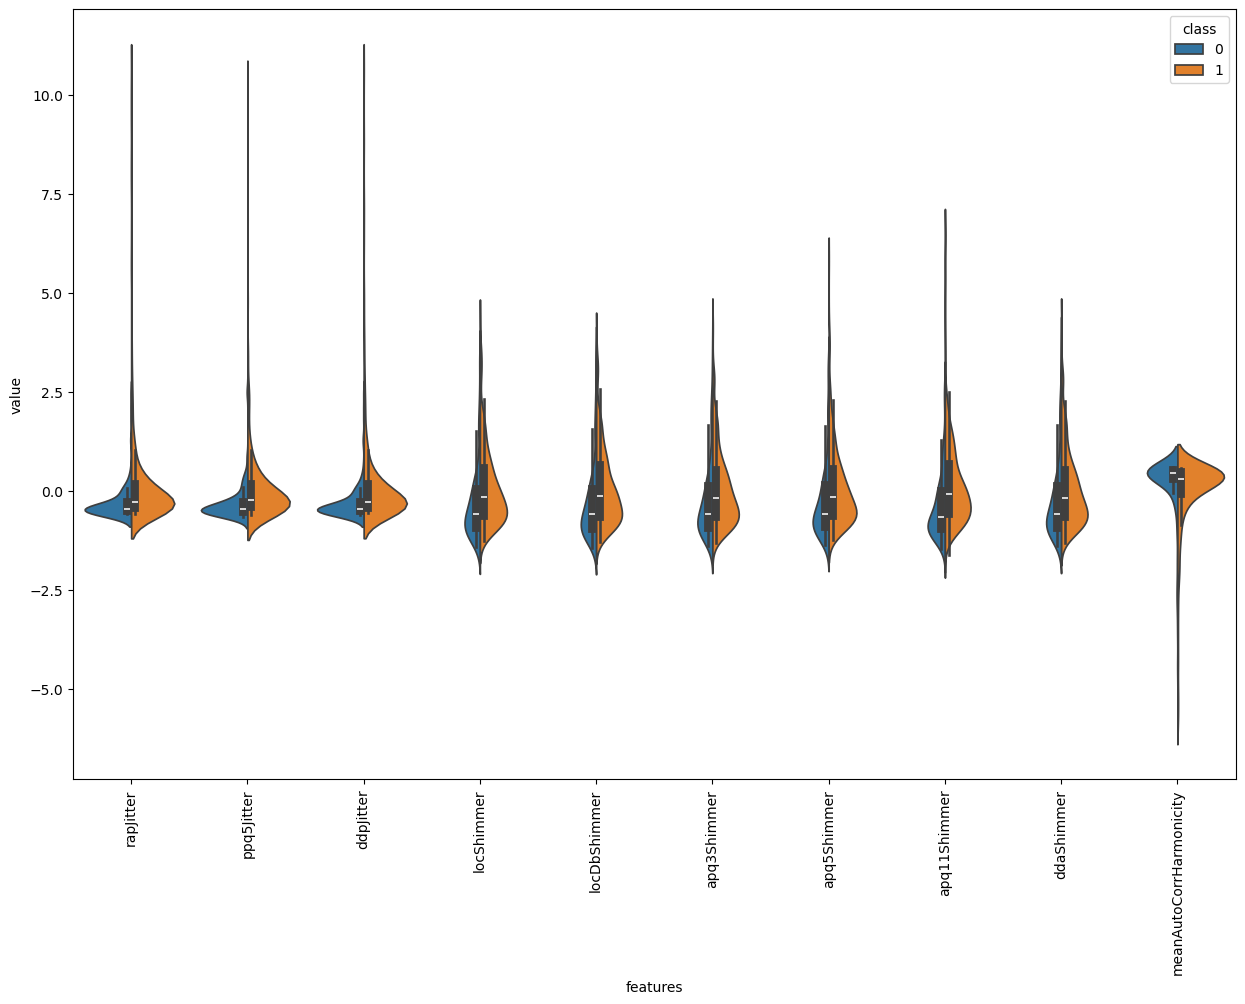

In [108]:
df = pd.concat([y,X.iloc[:,10:20]],axis=1)
df = pd.melt(df,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(data = df, x="features", y="value", hue="class",split=True)
plt.xticks(rotation=90)
plt.show()

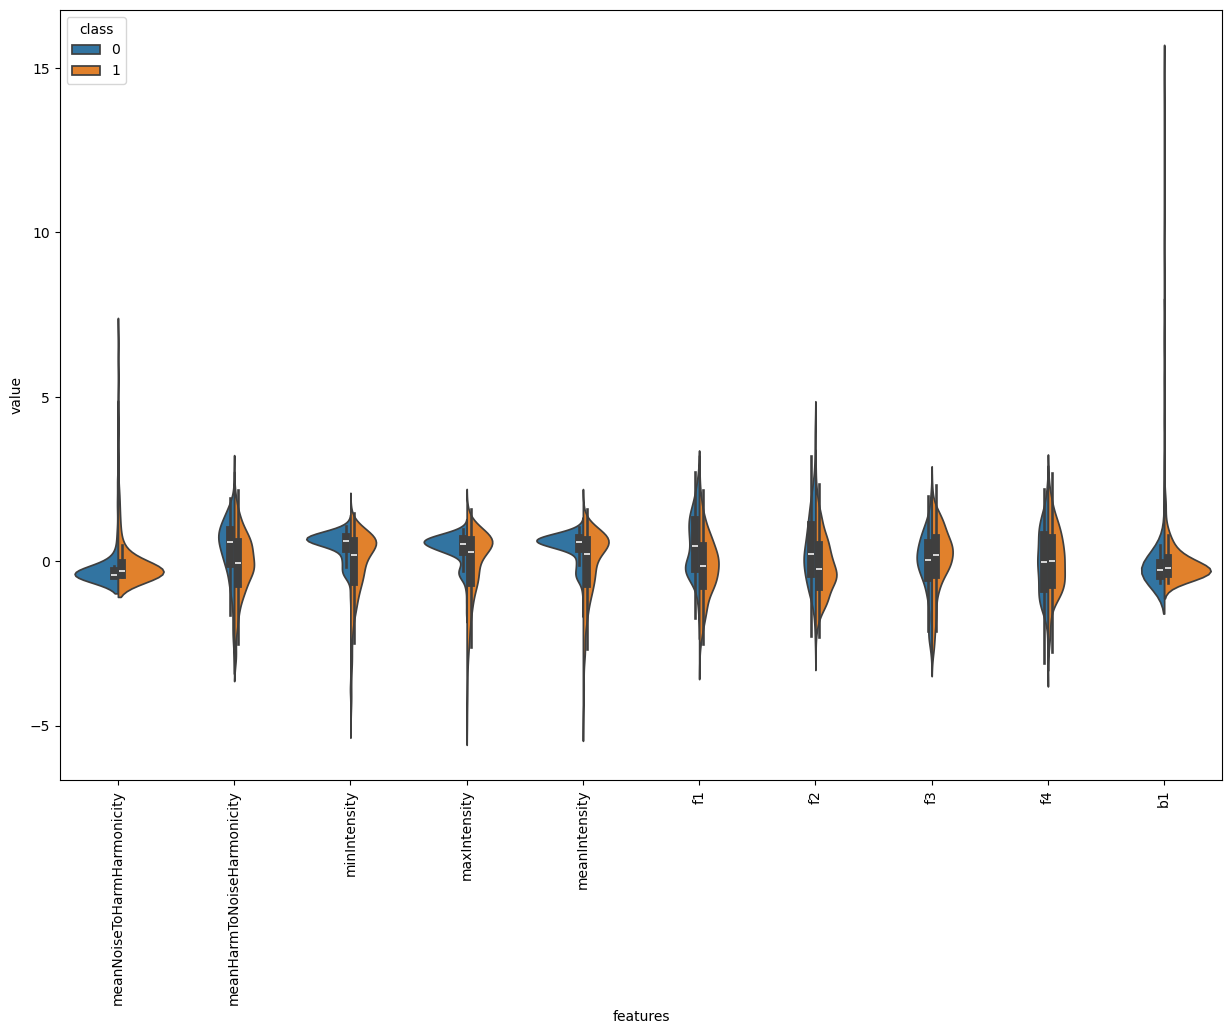

In [110]:
df = pd.concat([y,X.iloc[:,20:30]],axis=1)
df = pd.melt(df,id_vars="class",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15,10))
sns.violinplot(data = df, x="features", y="value", hue="class",split=True)
plt.xticks(rotation=90)
plt.show()

## Feature Selection:¶ 

### Feature Selection using correlation:

Correlation is a statistical measure describing the degree to which two variables are related or associated with each other. In feature selection, correlation is used very frequently to identify features that are highly correlated with the target variable and features highly correlated with each other.

For selecting features based on the correlation method, we typically will compute the correlation coefficient between the target variable and each of the features. A higher correlation coefficient indicates a high level of informativeness regarding the target variable; such features must be kept in the model. Correspondingly, the features which show lower correlation coefficients with the target variable are less useful for modeling.

We can also compute the correlation matrix between all pairs of features in order to find highly correlated features. The presence of highly correlated features may lead to overfitting and decrease the generalization performance of the model; hence, in such cases, it is usually desirable to remove one of the two correlated features. One common way to do so is by selecting the feature with the higher correlation coefficient value with the target variable and remove the other.

In [138]:
corr=df.corr()

In [140]:
# select the upper bounds of the matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))  # Use 'bool' instead of 'np.bool'

# select the columns that have a correlation bigger than a certain threshold with any other column
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# drop the columns
X_transformed = X.drop(to_drop, axis=1)
corr.drop(to_drop, inplace=True)


In [142]:
# print the 10 features that are the most correlated with the target
corr["class"].nlargest(11)

class                   1.000000
mean_MFCC_2nd_coef      0.398695
tqwt_minValue_dec_12    0.395740
tqwt_minValue_dec_11    0.366552
std_8th_delta           0.342875
std_9th_delta           0.335396
std_6th_delta           0.323126
std_7th_delta           0.319825
std_10th_delta          0.311160
std_11th_delta          0.311008
DFA                     0.306070
Name: class, dtype: float64

In [144]:
cols = corr["class"].nlargest(11).index[1:]

In [146]:
# Select the 10 features that are the most correlated with the target
df = X_transformed[cols]
# Split data into a training set and a test set
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = 0.2, random_state = 42)

### Logistic Regression using statsmodels:

It is a powerful tool that finds great success when our focus is statistical modeling and hypothesis testing. Statsmodels places heavy emphasis on hypothesis testing and offers a range of statistical tests  that can be used to test hypotheses about model parameters. This makes it a good choice for settings where hypothesis testing is a primary goal.

Statsmodels also provides full output, which is designed to be straightforward for the researcher or analyst to interpret. For example, summary tables for regression models provide coefficients, standard errors, p-values, and confidence intervals, along with a variety of goodness-of-fit measures.

All these factors make Statsmodels a good choice when we want our model to be as interpretable as possible and thoroughly tested.

In [148]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.583165
         Iterations 6


In [150]:
log_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  class   No. Observations:                  604
Model:                          Logit   Df Residuals:                      594
Method:                           MLE   Df Model:                            9
Date:                Tue, 17 Dec 2024   Pseudo R-squ.:                -0.02719
Time:                        23:25:18   Log-Likelihood:                -352.23
converged:                       True   LL-Null:                       -342.91
Covariance Type:            nonrobust   LLR p-value:                     1.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
mean_MFCC_2nd_coef       0.5106      0.145      3.515      0.000       0.226       0.795
tqwt_minValue_dec_12     0.2180      0.217      1.005      0.315      -0.207       0.643
tqwt_minValue_dec_11     0.1144      0.208      0.549      0.583      -0.294       0.523
std_8th_delta            0.0537      0.172      0.312      0.755      -0.284       0.391
std_9th_delta           -0.0012      0.180     -0.007      0.995      -0.354       0.352
std_6th_delta            0.4315      0.166      2.599      0.009       0.106       0.757
std_7th_delta            0.2378      0.172      1.383      0.167      -0.099       0.575
std_10th_delta          -0.0055      0.171     -0.032      0.974      -0.341       0.330
std_11th_delta          -0.0382      0.161     -0.238      0.812      -0.353       0.277
DFA                      0.1310      0.124      1.055      0.291      -0.112       0.374
========================================================================================
"""

The output of summary() provides a detailed summary of the model including the following:

A table that includes:

The name, coefficient, standard error, z-value, and p-value for each variable in the model. The coefficient represents the change in the log odds of the outcome for a one-unit change in the predictor variable, holding all other variables constant. The standard error is the standard deviation of the sampling distribution of the coefficient estimate, and the z-value is the coefficient divided by its standard error. The p-value is the probability of observing a z-value as extreme or more extreme than the observed value, assuming the null hypothesis that the true coefficient is zero.
The log-likelihood of the model, which is a measure of how well the model fits the data.

The pseudo R-squared measures of the model, which are measures of how well the model explains the variability in the data.

In addition to that we can access the AIC (Akaike information criterion) and BIC (Bayesian information criterion), which are measures of the quality of the model, lower values imply better fited models.



In [153]:
print(log_reg.aic, log_reg.bic)


724.4630933242308 768.498835303579


In [155]:
print(log_reg.wald_test(X_train))


<Wald test (chi2): statistic=[[97.18551378]], p-value=1.99059473686175e-16, df_denom=10>


C:\Users\Client\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 604, but rank is 10
  warnings.warn('covariance of constraints does not have full '
C:\Users\Client\anaconda3\Lib\site-packages\statsmodels\base\model.py:1912: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(


In [157]:
y_pred = log_reg.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)
print(accuracy_score(y_test,y_pred))

0.7236842105263158


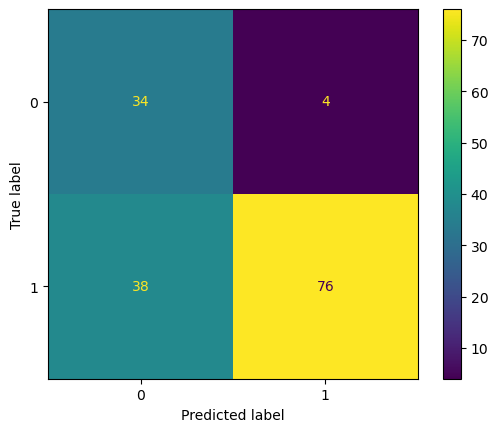

In [159]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()

### Feature Selection using SelectKbest method:

The SelectKBest method is a feature selection technique in machine learning that selects the top k most informative features from a dataset. The SelectKBest method works by first evaluating the statistical relationship between each feature and the target variable using a statistical test, such as chi-squared, f-regression, or mutual information. Then, it selects the k features with the highest scores from the test.

In [163]:
from sklearn.feature_selection import SelectKBest,f_classif


In [165]:
reg = SelectKBest(f_classif, k=10).fit(X, y)
# transform the data; drop columns
X_transformed = reg.transform(X)
X_new = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]
X_train,X_test,y_train,y_test = train_test_split(X_new,y,random_state=42,test_size = 0.2)

In [167]:
log_reg = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.587642
         Iterations 6


0.743421052631579


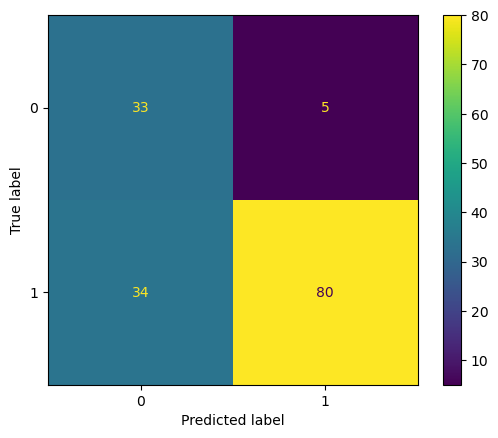

In [169]:
y_pred = log_reg.predict(X_test)
y_pred = np.where(y_pred > 0.5,1,0)
print(accuracy_score(y_test,y_pred))
# compute confusion matrix
cm = confusion_matrix(y_test,y_pred)
# plot confusion matrix
ConfusionMatrixDisplay(cm).plot()

### Feature Selection using recursive feature elimination:

In RFE, a machine learning model is trained on the full set of features, and the importance of each feature is then ranked based on its contribution to the model's accuracy. The feature with the lowest ranking is then removed from the dataset, and the process is repeated iteratively until a desired number of features is reached or the model's performance deteriorates.

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size = 0.2)

In [175]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10, step=1)
rfe = rfe.fit(X_train, y_train)

In [176]:
print('Chosen best 10 feature by rfe:',X_train.columns[rfe.support_])


Chosen best 10 feature by rfe: Index(['std_delta_delta_log_energy', 'std_7th_delta_delta',
       'tqwt_entropy_shannon_dec_27', 'tqwt_entropy_log_dec_1',
       'tqwt_entropy_log_dec_7', 'tqwt_entropy_log_dec_33',
       'tqwt_maxValue_dec_20', 'tqwt_skewnessValue_dec_9',
       'tqwt_kurtosisValue_dec_31', 'tqwt_kurtosisValue_dec_33'],
      dtype='object')


### Feature Selection using Recursive feature elimination with cross validation


Recursive Feature Elimination with Cross-Validation is an extension of the Recursive Feature Elimination (RFE) algorithm, which adds a cross-validation step to the feature selection process.

In RFECV, the dataset is first split into training and testing sets, and then the RFE algorithm is applied to the training set to determine the optimal subset of features. However, instead of using a fixed number of features, RFECV uses cross-validation to estimate the optimal number of features to select. This is done by iteratively training the model on subsets of the features and evaluating its performance using cross-validation. The number of features selected is then chosen based on the optimal cross-validation score.

In [181]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), cv=5,scoring='accuracy', step=1)
rfecv = rfecv.fit(X_train, y_train)

In [182]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 18
Best features : Index(['mean_MFCC_7th_coef', 'mean_delta_log_energy',
       'std_delta_delta_log_energy', 'std_7th_delta_delta',
       'tqwt_energy_dec_18', 'tqwt_entropy_shannon_dec_27',
       'tqwt_entropy_log_dec_1', 'tqwt_entropy_log_dec_7',
       'tqwt_entropy_log_dec_33', 'tqwt_TKEO_mean_dec_15',
       'tqwt_TKEO_std_dec_11', 'tqwt_stdValue_dec_10', 'tqwt_minValue_dec_17',
       'tqwt_maxValue_dec_5', 'tqwt_maxValue_dec_20',
       'tqwt_skewnessValue_dec_9', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_33'],
      dtype='object')


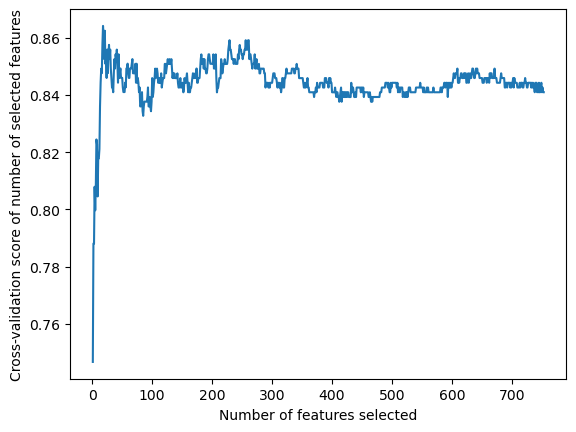

In [183]:
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score of number of selected features")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

### Model Selection using cross validation:

Now that we have selected our features, next step is to try out different models and select the best performing one.

In [189]:
df = X[X.columns[rfecv.support_]]


In [221]:
models = [LogisticRegression(),RandomForestClassifier(),CatBoostClassifier(silent=True), BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42),LGBMClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),SVC(),LinearDiscriminantAnalysis()]

d = {}
d["Model"] = ["Logistic Regression","RandomForest", "CatBoost","Bagging", "LightGBM","GradientBoosting", "AdaBoost", "SVM", "LDA"]
d["accuracy"] = []
d["precision"] = []
d["recall"] = []
d["f1_score"] = []
d["auc"] = []
for i,model in enumerate(d["Model"]):
    y_pred = cross_val_predict(models[i],df,y)
    d["accuracy"].append(accuracy_score(y_pred,y))
    d["precision"].append(precision_score(y_pred,y))
    d["recall"].append(recall_score(y_pred,y))
    d["f1_score"].append(f1_score(y_pred,y))
    d["auc"].append(roc_auc_score(y_pred,y))

[LightGBM] [Info] Number of positive: 451, number of negative: 153
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000127 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3629
[LightGBM] [Info] Number of data points in the train set: 604, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.746689 -> initscore=1.081029
[LightGBM] [Info] Start training from score 1.081029
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\Client\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Client\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Client\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Client\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users

In [223]:
models_summary = pd.DataFrame(d)

In [225]:
models_summary.sort_values(["accuracy"], ascending = False)


,Model,accuracy,precision,recall,f1_score,auc
7,SVM,0.853175,0.955674,0.862400,0.906644,0.835780
0,Logistic Regression,0.851852,0.925532,0.881757,0.903114,0.812830
2,CatBoost,0.849206,0.945035,0.865260,0.903390,0.821916
8,LDA,0.849206,0.953901,0.859425,0.904202,0.829712
4,LightGBM,0.846561,0.934397,0.869637,0.900855,0.811485
6,AdaBoost,0.842593,0.932624,0.866557,0.898377,0.805762
1,RandomForest,0.833333,0.936170,0.854369,0.893401,0.796750
5,GradientBoosting,0.832011,0.930851,0.856444,0.892099,0.791858
3,Bagging,0.818783,0.904255,0.860034,0.881590,0.764373


We can see that SVM is the best performing model judging by accuracy and it has a high score in all the other metrics.However an argument could be made for Logistic Regression  since it has the maximum recall value.